In [1]:
from matplotlib import pyplot as plt
from wingstructure import data, aero
import numpy as np

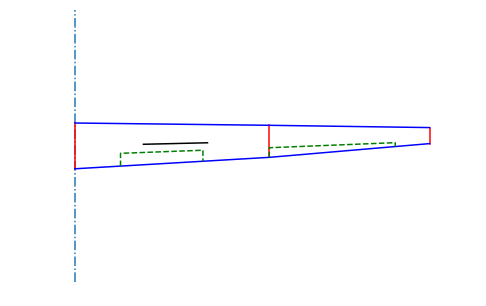

In [2]:
# create wing object
wing = data.Wing()

# add sections to wing
wing.add_section(data.Point(0.0, 0.0, 0.0), 1.0, 0.0)
wing.add_section(data.Point(0.05, 4.25, 0.0), 0.7, 0.0)
wing.add_section(data.Point(0.1, 7.75, 0.0), 0.35, 0.0)

# set fuselage with (=root of wing) to zero
wing.set_root_pos(0.0)

# define spoiler position
wing.set_spoiler(1.5, 2.9)

# define control-surfaces
wing.set_flap('flap', 1, 2.8,[0.7,0.7])
wing.set_flap('flap2', 4.25, 7, [0.7,0.8])

# display simple wing
plt.figure(figsize=(8,5))
wing.plot()
plt.savefig('wing.png')

0.01871572770370315
0.01871572770370315
dict_items([])
dict_items([('flap2', [5, -5])])
dict_items([])


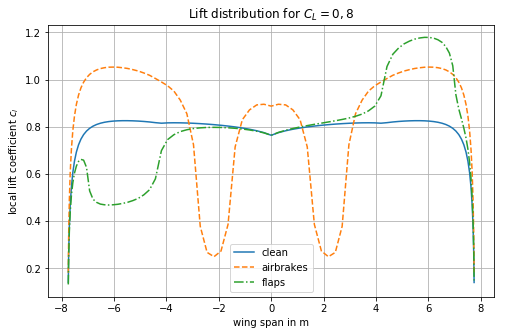

In [3]:
liftana = aero.LiftAnalysis.generate(wing)

span_pos = liftana.ys

α, distribution, C_Dib = liftana.calculate(C_L=0.8)
α_qr, distribution_q, C_Dia = liftana.calculate(C_L=0.8, 
            controls={'flap2': [5, -5]})
α_ab, distribution_ab, C_Di = liftana.calculate(C_L=0.8, airbrake=True)

plt.figure(figsize=(8,5))
plt.plot(span_pos, distribution, label='clean')
plt.plot(span_pos, distribution_ab, '--', label='airbrakes')
plt.plot(span_pos, distribution_q, '-.', label='flaps')
plt.xlabel('wing span in m')
plt.ylabel('local lift coefficient $c_l$')
plt.title('Lift distribution for $C_L = 0,8$')
plt.grid()
plt.legend()
plt.savefig('Liftdistribution.png')
plt.savefig('Liftdistribution.pdf')

In [6]:
aero.calculate(wing, C_L=1.0)

{'c_ls': array([0.17526834, 0.3342843 , 0.47155578, 0.58651597, 0.68078389,
        0.75697514, 0.81793964, 0.86639283, 0.90472905, 0.93496854,
        0.95876624, 0.97745008, 0.99207443, 1.00346589, 1.0122734 ,
        1.01899972, 1.02403923, 1.02769404, 1.03020185, 1.03173995,
        1.03244711, 1.03241758, 1.03171982, 1.03037879, 1.02838935,
        1.02566923, 1.02200214, 1.01913148, 1.02090594, 1.02139576,
        1.02110045, 1.02017507, 1.01872381, 1.01677718, 1.01435829,
        1.01144383, 1.00801175, 1.00398572, 0.99929012, 0.99375449,
        0.98719265, 0.97917582, 0.96914853, 0.95520178, 0.96914853,
        0.97917582, 0.98719265, 0.99375449, 0.99929012, 1.00398572,
        1.00801175, 1.01144383, 1.01435829, 1.01677718, 1.01872381,
        1.02017507, 1.02110045, 1.02139576, 1.02090594, 1.01913148,
        1.02200214, 1.02566923, 1.02838935, 1.03037879, 1.03171982,
        1.03241758, 1.03244711, 1.03173995, 1.03020185, 1.02769404,
        1.02403923, 1.01899972, 1.012273

In [ ]:
aero